In [ ]:
install.packages("twitteR", repos = "https://cran.r-project.org/")
install.packages("ROAuth", repos = "https://cran.r-project.org/")
install.packages("RSQLite", repos = "https://cran.r-project.org/")

Install twitter and OAuth packages

In [3]:
library(twitteR)
library(ROAuth)
library(RSQLite)

Include twitter and OAuth libraries

In [4]:
consumer_key <- "BKro8XRNa8BqG7dl5kkfRNzAx"
consumer_secret <- "FAhRriPzc5jkEJX8LdzqDpDxzg1LDgXwwKU8nq8154RvAIpnQu"
access_token <- "772574727051370496-aM0inDDiZEow8fHaVBXHKV1uDiBtKeA"
access_secret <- "eIOajp1GUa0yR1sBXCIqEVHM7VJCo0c1dSGp6YoZHCm4J"
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

[1] "Using direct authentication"


Create connection with twitter API using OAuth

In [5]:
tweets <- searchTwitter('#rstats', n=50)
head(tweets)

[[1]]
[1] "MartinGaedt: RT @dataandme: \"Visualizing Streaming Data And Alert Notification with Shiny\" https://t.co/dojKCyRXmP via @datascienceplus #rstats #dataviz"

[[2]]
[1] "LucioCorsaro2: RT @KirkDBorne: How to Install #Microsoft R Server for Windows: https://t.co/1VPRKYFL9r #Rstats #BigData #MachineLearning #DataScience http"

[[3]]
[1] "MartinGaedt: RT @dataandme: Worthy read: \"Predicting gentrification using longitudinal census data\" by @KenSteif https://t.co/917WFLbx42 #rstats #urbanp"

[[4]]
[1] "sakimjan: RT @KirkDBorne: How to Install #Microsoft R Server for Windows: https://t.co/1VPRKYFL9r #Rstats #BigData #MachineLearning #DataScience http"

[[5]]
[1] "datascienceplus: Analytical and Numerical Solutions to Linear Regression Problems https://t.co/SHBFrg1J3P #rstats #regressionmodels"

[[6]]
[1] "pacocuak: RT @JennyBryan: Find upcoming #rstats conferences and your local user  or @RLadiesGlobal group here:\nhttps://t.co/H2vWcIKMAR\nthx to @Rivers"


Searching Twitter: passing "#rstats" as the search query and quering 50 tweets using "n"

In [6]:
head(strip_retweets(tweets, strip_manual=TRUE, strip_mt=TRUE))
tweets <- head(strip_retweets(tweets, strip_manual=TRUE, strip_mt=TRUE))

[[1]]
[1] "datascienceplus: Analytical and Numerical Solutions to Linear Regression Problems https://t.co/SHBFrg1J3P #rstats #regressionmodels"

[[2]]
[1] "NNZST: When will we see #seabirds on the menu for cool #rstats points?? <ed><U+00A0><U+00BD><ed><U+00B8><U+0086><ed><U+00A0><U+00BD><ed><U+00B8><U+0086> https://t.co/nKMyv06fSU"

[[3]]
[1] "amrspeaks: Rbloggers: Using Armadillo with SuperLU https://t.co/7TQHSfV0BH #rstats #DataScience"

[[4]]
[1] "DeborahTannon: #RStats Using Armadillo with SuperLU : https://t.co/jaQ0lb2hbx"

[[5]]
[1] "Rbloggers: Using Armadillo with SuperLU https://t.co/3GJaNUv2gm #rstats #DataScience"

[[6]]
[1] "spottheoutlier: I WILL make this ExpressionSet work. It WILL work with 2 matrices! #Rstats #SciencingSaturday"


Removing retweets from fetched tweets using strip_retweets

In [7]:
crantastic <- getUser('crantastic')
crantastic$getDescription()

[1] "I like some things, and I dislike everything else."

Get twitter User record with handle 'crantastic' and then fetch its Description

In [8]:
crantastic$getFollowersCount()

[1] 32

Get number of followers of the selected user

In [9]:
crantastic$getFriends(n=5)

$`35985504`
[1] "MisElizaJane"

$`90472293`
[1] "emtothea"

$`30987732`
[1] "MelanieScrofano"

$`4709232802`
[1] "WynonnaEarp"


Get the first 5 friends of the User

In [10]:
crantastic$getFavorites(n=5)

[[1]]
[1] "erictcarrasco: That \"Black lung\" line was a @Chy_Leigh joke. Loved it so much we made her keep saying it. #Supergirl #SupergirlLives #Sanvers"

[[2]]
[1] "MelanieScrofano: I shall be INSUFFERABLE when the @WynonnaEarp comic I'm co-writing with @BeauSmithRanch comes out. \"The Earp Sister https://t.co/h0Q6XrE1dV"

[[3]]
[1] "katevoegele: just casually throwing my white gold hoops in the ring to play #GretchenWieners in this https://t.co/0l9FSGjTuD"

[[4]]
[1] "boglesthemind: Here we go, QSO - female writer, female director, female producer, female editor, female lead, female first ad #PersonOfInterest #toofemale"

[[5]]
[1] "ohnikkers: @keithkurson naw they did two shows in london and i went to both.  i made hannah fall in love with the scottish accent tho so NEXT TIME"


Get the five favorite tweets for the User

In [11]:
df <- twListToDF(tweets)
head(df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
Analytical and Numerical Solutions to Linear Regression Problems https://t.co/SHBFrg1J3P #rstats #regressionmodels,FALSE,1,NA,2017-02-18 21:43:02,FALSE,NA,833069337682509825,NA,"<a href=""http://www.google.com/"" rel=""nofollow"">Google</a>",datascienceplus,1,FALSE,FALSE,NA,NA
When will we see #seabirds on the menu for cool #rstats points?? <ed><U+00A0><U+00BD><ed><U+00B8><U+0086><ed><U+00A0><U+00BD><ed><U+00B8><U+0086> https://t.co/nKMyv06fSU,FALSE,1,NA,2017-02-18 21:34:08,FALSE,NA,833067099811573760,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NNZST,0,FALSE,FALSE,NA,NA
Rbloggers: Using Armadillo with SuperLU https://t.co/7TQHSfV0BH #rstats #DataScience,FALSE,0,NA,2017-02-18 21:22:28,FALSE,NA,833064162620272646,NA,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",amrspeaks,0,FALSE,FALSE,NA,NA
#RStats —Using Armadillo with SuperLU : https://t.co/jaQ0lb2hbx,FALSE,0,NA,2017-02-18 21:22:18,FALSE,NA,833064119385387009,NA,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",DeborahTannon,0,FALSE,FALSE,NA,NA
Using Armadillo with SuperLU https://t.co/3GJaNUv2gm #rstats #DataScience,FALSE,0,NA,2017-02-18 21:20:35,FALSE,NA,833063687959240707,NA,"<a href=""http://www.r-bloggers.com"" rel=""nofollow"">r-bloggers.com</a>",Rbloggers,2,FALSE,FALSE,NA,NA
I WILL make this ExpressionSet work. It WILL work with 2 matrices! #Rstats #SciencingSaturday,FALSE,1,NA,2017-02-18 21:18:58,FALSE,NA,833063281384357892,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",spottheoutlier,0,FALSE,FALSE,NA,NA


Convert the unstructured tweet data to a structured data frame using twListToDF

In [12]:
sql_lite_file = tempfile()
register_sqlite_backend(sql_lite_file)
store_tweets_db(tweets)

[1] TRUE

1. Create a tempfile to store in the database
2. Add the file to the sqlite database
3. Store the tweets in the database

In [13]:
from_db = load_tweets_db()
head(from_db)

[[1]]
[1] "datascienceplus: Analytical and Numerical Solutions to Linear Regression Problems https://t.co/SHBFrg1J3P #rstats #regressionmodels"

[[2]]
[1] "NNZST: When will we see #seabirds on the menu for cool #rstats points?? <ed><U+00A0><U+00BD><ed><U+00B8><U+0086><ed><U+00A0><U+00BD><ed><U+00B8><U+0086> https://t.co/nKMyv06fSU"

[[3]]
[1] "amrspeaks: Rbloggers: Using Armadillo with SuperLU https://t.co/7TQHSfV0BH #rstats #DataScience"

[[4]]
[1] "DeborahTannon: #RStats Using Armadillo with SuperLU : https://t.co/jaQ0lb2hbx"

[[5]]
[1] "Rbloggers: Using Armadillo with SuperLU https://t.co/3GJaNUv2gm #rstats #DataScience"

[[6]]
[1] "spottheoutlier: I WILL make this ExpressionSet work. It WILL work with 2 matrices! #Rstats #SciencingSaturday"


Retrieve the tweets from the database

In [14]:
cran_tweets <- userTimeline('cranatic')
cran_tweets[1:5]

[[1]]
[1] "cranatic: Update: Bchron, BoolNet, caribou, CePa, fmri, HTSCluster, isa2, lessR, lgcp, spatstat. http://t.co/skyrajMA #rstats"

[[2]]
[1] "cranatic: New: extrafont, extrafontdb, Rttf2pt1, x12GUI. http://t.co/skyrajMA #rstats"

[[3]]
[1] "cranatic: Update: drc, RcmdrPlugin.survival, rrcov, spls. http://t.co/eEoXNifB #rstats"

[[4]]
[1] "cranatic: New: hzar. http://t.co/eEoXNifB #rstats"

[[5]]
[1] "cranatic: Update: directlabels, forensim, gdata, gWidgetstcltk, gWidgetsWWW, harvestr, rrlda, Rz, Sim.DiffProc, ... http://t.co/9JEe7K91 #rstats"


Retrieve most recent 5 tweets by user 'cranatic'

In [15]:
cran_tweets_large <- userTimeline('cranatic', n=100)
length(cran_tweets_large)

[1] 100

Fetching most recent 100 tweets by user 'cranatic' by overriding the default limit of 20 tweets

In [16]:
avail_trends = availableTrendLocations()
head(avail_trends)

name,country,woeid
Worldwide,,1
Winnipeg,Canada,2972
Ottawa,Canada,3369
Quebec,Canada,3444
Montreal,Canada,3534
Toronto,Canada,4118


Get the trending locations and its woeid

In [17]:
close_trends = closestTrendLocations(-42.8, -71.1)
head(close_trends)

name,country,woeid
Concepcion,Chile,349860


Get the closest trend location for a given set of co-ordinates and its woeid

In [18]:
trends = getTrends(2367105)
head(trends)

name,url,query,woeid
#NationalDrinkWineDay,http://twitter.com/search?q=%23NationalDrinkWineDay,%23NationalDrinkWineDay,2367105
#Boskone,http://twitter.com/search?q=%23Boskone,%23Boskone,2367105
#AAASmtg,http://twitter.com/search?q=%23AAASmtg,%23AAASmtg,2367105
#ZGWL,http://twitter.com/search?q=%23ZGWL,%23ZGWL,2367105
#GoNU,http://twitter.com/search?q=%23GoNU,%23GoNU,2367105
Huskies,http://twitter.com/search?q=Huskies,Huskies,2367105


Fetch the trending topics for the given location identified using woeid

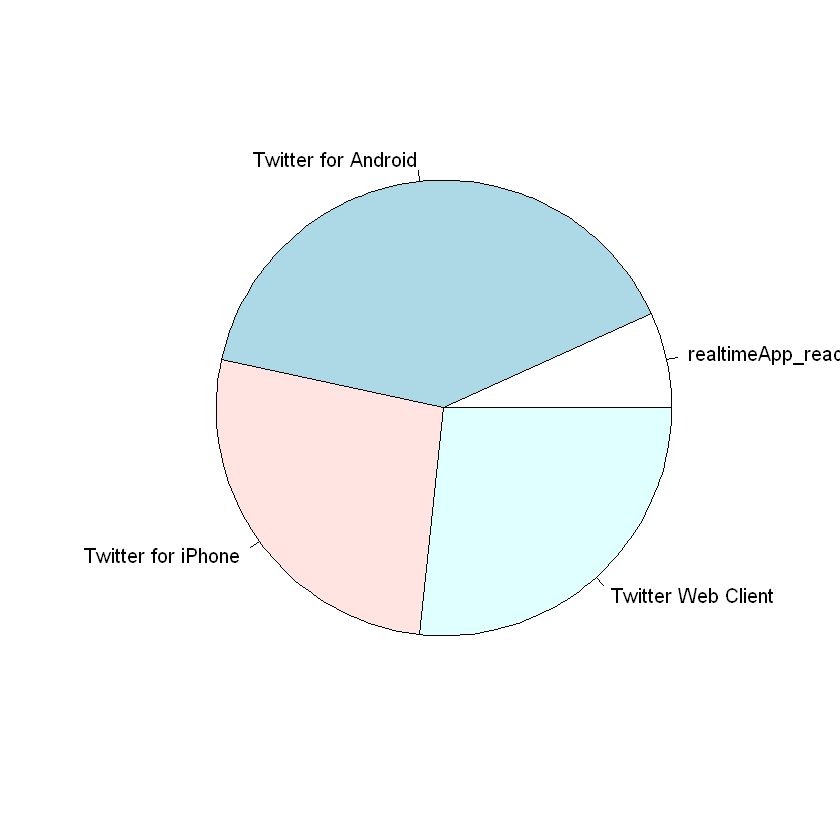

In [19]:
r_tweets <- searchTwitter("#rstats", n=300)
sources <- sapply(r_tweets, function(x) x$getStatusSource())
sources <- gsub("</a>", "", sources)
sources <- strsplit(sources, ">")
sources <- sapply(sources, function(x) ifelse(length(x) > 1, x[2], x[1]))
source_table = table(sources)
pie(source_table[source_table > 10])

Creating a pie chart using a set of predefined data

References:
1. http://geoffjentry.hexdump.org/twitteR.pdf